In [136]:
import numpy as np
import random
import pandas as pd
import itertools

def calc_nextvalue(oldvalue):
    r = (random.random()/10) - 0.05
    return (1 + r)*oldvalue + 10

def calc_newvalue(oldvalue, i):
    return calc_nextvalue(oldvalue)

months = np.arange(119)
result = itertools.accumulate(months, calc_newvalue, initial=calc_nextvalue(1000))
df = pd.DataFrame(result)

# df.head
dfDoubled = df[(df[0] > 2000)]
dfDoubled.index.values[0] if dfDoubled.size > 0 else None

92

In [153]:
import numpy as np
import random
import pandas as pd

def calc_nextvalue(oldvalue):
    r = (random.random()/10) - 0.05
    return (1 + r)*oldvalue + 10

currentvalue = 1000
def calc_newvalue(x):
    global currentvalue
    currentvalue = calc_nextvalue(currentvalue)
    return currentvalue


months = np.arange(120)
result = np.frompyfunc(calc_newvalue, 1, 1)(months)
df = pd.DataFrame(data=result, columns=['portfoliovalue'])

# df.head(1)
df[(df['portfoliovalue'] > 2000)]

,portfoliovalue
115,2018.85079
116,2116.688784
117,2056.513672
119,2073.908321


In [160]:
import random


Last = []
FirstD = []
for m in range (1, 251):
    Vo = 1000
    L = []
    n = 0
    VoMax = Vo
    while n <= 120 or VoMax < 2000:
        r = (random.random()/10) - 0.05
        V = (1 + r)*Vo + 10
        L.append(V)
        if V > VoMax:
            VoMax = V
        Vo = V
        n += 1
    Last.append(L[119])
    i = 1
    for n in L:
        if n >= 2000:
            FirstD.append(i)
            break
        i += 1


In [161]:
print(Last)
print(FirstD)
print("Smallest terminal value:", min(Last))
print("Largest terminal value:", max(Last))

[1776.8009583595208, 2316.402259037009, 2318.9723181855943, 2795.2811857310867, 1548.1759106261213, 1980.0264089923141, 2214.1014575635786, 1776.8432496537364, 1875.3884557655583, 1930.9873773527784, 1494.8744953208927, 2680.1936675013408, 2012.0243953404804, 2405.937160638167, 1409.1854308105806, 1662.6503519355633, 2279.9449905677566, 2200.2009546369645, 2980.902092143397, 2331.2048020843426, 2463.111233322101, 2936.046299537015, 2015.026759426453, 2481.6594921392825, 1572.6745966659935, 2784.9285467296377, 2523.0685361836686, 2694.627183530995, 1728.8065111796852, 1866.6464994794978, 3804.3080165221236, 1721.1076972866547, 1898.7856493664108, 2666.7272141785106, 2051.420279561102, 1648.7457832390241, 1829.8399112689071, 2226.116984103275, 1805.0068602615574, 2043.0577852751794, 2380.5789549219603, 2112.991841611966, 1690.8892086074804, 2822.015912053458, 1964.028548899975, 2323.0488545929616, 2460.194220280101, 2496.060354776846, 3255.590222017799, 1453.7010541633279, 1495.276202942

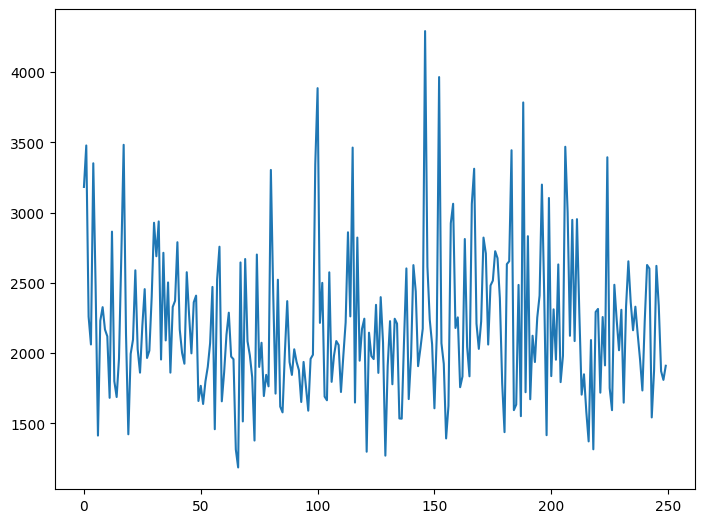

In [14]:
from matplotlib import pyplot as plt
import numpy as np

# x = np.arange(0, 10)
y = Last
# y = np.sin(x)
x = np.arange(0, len(Last) )

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt

(array([4.0000e+00, 2.1000e+01, 9.1000e+01, 3.3600e+02, 1.0350e+03,
        2.5300e+03, 5.4190e+03, 9.4870e+03, 1.3467e+04, 1.6441e+04,
        1.6715e+04, 1.4020e+04, 9.9580e+03, 5.8010e+03, 2.9500e+03,
        1.1760e+03, 4.0200e+02, 1.0800e+02, 3.4000e+01, 5.0000e+00]),
 array([3.27775826, 3.44869043, 3.61962261, 3.79055479, 3.96148696,
        4.13241914, 4.30335132, 4.4742835 , 4.64521567, 4.81614785,
        4.98708003, 5.1580122 , 5.32894438, 5.49987656, 5.67080874,
        5.84174091, 6.01267309, 6.18360527, 6.35453744, 6.52546962,
        6.6964018 ]),
 <BarContainer object of 20 artists>)

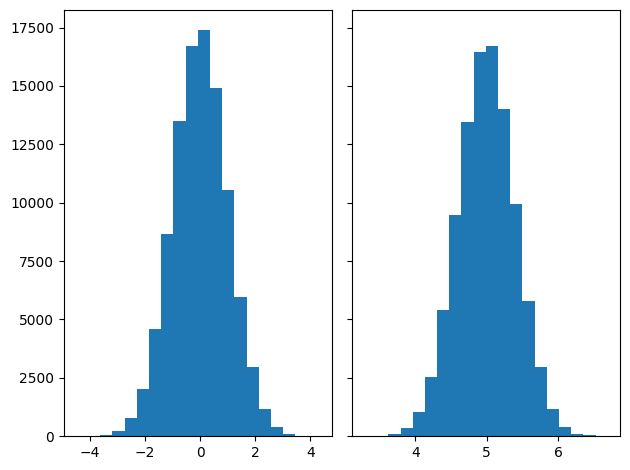

In [158]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng()

N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

In [157]:
import numpy
print(numpy.__version__)

1.24.2


(array([ 1.,  0.,  4.,  1.,  2.,  4.,  6.,  7., 11., 12., 18., 14., 14.,
        11., 14., 11.,  8., 11., 13.,  8.,  8., 10.,  8.,  4.,  4., 10.,
         6.,  4.,  4.,  6.,  5.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([1128.52589401, 1190.31676431, 1252.10763461, 1313.89850491,
        1375.6893752 , 1437.4802455 , 1499.2711158 , 1561.0619861 ,
        1622.8528564 , 1684.6437267 , 1746.434597  , 1808.2254673 ,
        1870.0163376 , 1931.8072079 , 1993.5980782 , 2055.3889485 ,
        2117.17981879, 2178.97068909, 2240.76155939, 2302.55242969,
        2364.34329999, 2426.13417029, 2487.92504059, 2549.71591089,
        2611.50678119, 2673.29765149, 2735.08852179, 2796.87939208,
        2858.67026238, 2920.46113268, 2982.25200298, 3044.04287328,
        3105.83374358, 3167.62461388, 3229.41548418, 3291.20635448,
        3352.99722478, 3414.78809508, 3476.57896538, 3538.36983567,
        3600.16070597, 3661.95157627

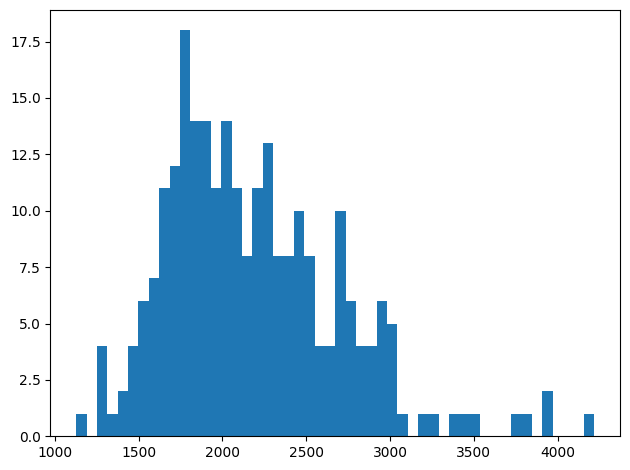

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# fig, axs = plt.subplots(1)
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(Last, bins=50)